In [1]:
import numpy as np
from generate import generator
from model import qmodel, training_model

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
g=generator(20)
qm=qmodel(2, 2)
tm=training_model(qm, 0.5, 0.9)
tm.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, Dimension(2)) 0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            (None, Dimension(2)) 0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 2)            6882        input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________

In [4]:
def prepare(g, qmodel):
    for x, r in g:
        s0, s1, final = x
        #print s0.shape
        q0 = qmodel.predict_on_batch(s0)
        mask = np.zeros_like(q0)
        imax = np.argmax(q0, axis=-1)
        mask[imax==0, 0] = 1.0
        mask[imax==1, 1] = 1.0
        #print imax, mask
        yield [s0, s1, mask, final], r
        
gp = prepare(g, qm)
next(gp)

([array([[0.7927, 0.3556],
         [0.1846, 0.618 ],
         [0.8671, 0.2099],
         [0.0632, 0.1845],
         [0.0695, 0.571 ],
         [0.2671, 0.4336],
         [0.0814, 0.6699],
         [0.8534, 0.7517],
         [0.2595, 0.5646],
         [0.0431, 0.8666],
         [0.5982, 0.6776],
         [0.0218, 0.8691],
         [0.9039, 0.1723],
         [0.0477, 0.5873],
         [0.3996, 0.3578],
         [0.8291, 0.8572],
         [0.2387, 0.6167],
         [0.6112, 0.1941],
         [0.2387, 0.9037],
         [0.1035, 0.4739]]), array([[0.8927, 0.3556],
         [0.2846, 0.618 ],
         [0.8671, 0.3099],
         [0.1632, 0.1845],
         [0.1695, 0.571 ],
         [0.2671, 0.5336],
         [0.0814, 0.7699],
         [0.8534, 0.8517],
         [0.2595, 0.6646],
         [0.0431, 0.9666],
         [0.6982, 0.6776],
         [0.0218, 0.9691],
         [1.0039, 0.1723],
         [0.1477, 0.5873],
         [0.4996, 0.3578],
         [0.9291, 0.8572],
         [0.2387, 0.7167],
 

In [5]:
tm.fit_generator(gp, steps_per_epoch = 1000, epochs=20, verbose=1)

Epoch 1/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0349
Epoch 2/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0344
Epoch 3/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0341
Epoch 4/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0340
Epoch 5/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0322
Epoch 6/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0318
Epoch 7/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0300
Epoch 8/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0279
Epoch 9/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0275
Epoch 10/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0273
Epoch 11/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0258
Epoch 12/20
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0269
E

In [6]:
tm.fit_generator(gp, steps_per_epoch = 10000, epochs=10, verbose=1)

Epoch 1/10
10000/10000 [==============================] - 17s 2ms/step - loss: 0.0235
Epoch 2/10
10000/10000 [==============================] - 17s 2ms/step - loss: 0.0230
Epoch 3/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0230
Epoch 4/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0225
Epoch 5/10
10000/10000 [==============================] - 16s 2ms/step - loss: 0.0222
Epoch 6/10
  404/10000 [>.............................] - ETA: 16s - loss: 0.0236

KeyboardInterrupt: 

In [7]:
def sample(nx, nt, model):
    x = np.arange(0.0, 1.0, 1.0/nx)
    t = np.arange(0.0, 1.0, 1.0/nt)
    xg, tg = np.meshgrid(x, t)
    s = np.array((xg.reshape((-1,)),tg.reshape((-1,)))).T
    #print "s:",s.shape,s
    q = model.predict_on_batch(s)
    u = q[:,0] - np.min(q, axis=-1)
    v = q[:,1] - np.min(q, axis=-1)
    return xg, tg, u.reshape(xg.shape), v.reshape(xg.shape)


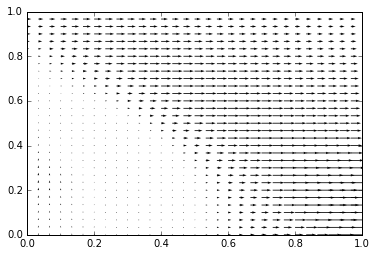

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
def plot(model):
    x,y,u,v = sample(30,30,model)
    fig, ax = plt.subplots()
    #ax = fig.gca(projection='3d')
    #surf = ax.plot_wireframe(x, y, z, linewidth=0, antialiased=False)
    surf = ax.quiver(x, y, u, v)
    #ax.clabel(surf, inline=1, fontsize=15)
plot(qm)

In [9]:
print sample(10,10,qm)

(array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]]), array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3],
       [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 